Section 1: MLP Model Implementation & Experiment Tracking

1. Implement a Multi-Layer Perceptron (MLP) Using the Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Labels reshaped to column vector

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)

np.random.seed(30)
# Shuffle and split the dataset into 70% training, 30% remaining (for validation & testing)
X_train, X_rem, y_train, y_rem = train_test_split(X, y_one_hot, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Further split the remaining 30% into 10% validation and 20% testing
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=2/3, random_state=42, shuffle=True, stratify=y_rem)

# Normalize feature values to [0,1] using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Print shapes to verify correct splitting
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (105, 4), y_train shape: (105, 3)
X_val shape: (15, 4), y_val shape: (15, 3)
X_test shape: (30, 4), y_test shape: (30, 3)


2. Define and Train the MLP Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# MLP model
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50,
    verbose=1
)

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.3531 - loss: 1.2409 - val_accuracy: 0.3333 - val_loss: 1.2246
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3313 - loss: 1.2181 - val_accuracy: 0.3333 - val_loss: 1.2009
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3531 - loss: 1.1897 - val_accuracy: 0.3333 - val_loss: 1.1802
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3444 - loss: 1.1720 - val_accuracy: 0.3333 - val_loss: 1.1620
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3552 - loss: 1.1616 - val_accuracy: 0.3333 - val_loss: 1.1452
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3861 - loss: 1.1529 - val_accuracy: 0.3333 - val_loss: 1.1301
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3569 - loss: 1.1440 - val_accuracy: 0.3333 - val_loss: 1.1164
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3840 - loss: 1.1171 - val_accuracy: 0.4000 - val_loss: 1.1034

3. Evaluate Model Performance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Test Accuracy: 0.7333
Test Precision: 0.8519
Test Recall: 0.7333
Test F1 Score: 0.6825


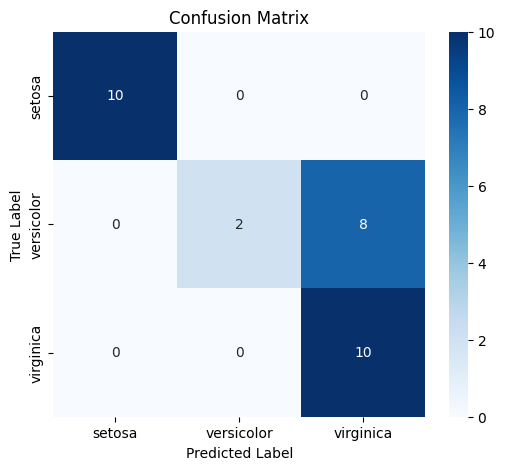

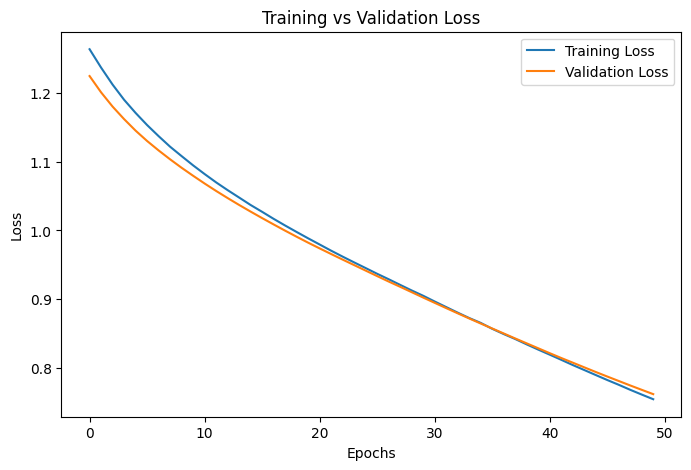

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Testing on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Evaluation of test set
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
!pip install wandb torch torchvision

4. Set Up Experiment Tracking with Weights & Biases (W&B)

[1.2636494636535645, 1.2369086742401123, 1.2121918201446533, 1.1900962591171265, 1.1709569692611694, 1.153325080871582, 1.1371827125549316, 1.1217957735061646, 1.1081106662750244, 1.0946624279022217, 1.0820236206054688, 1.0699101686477661, 1.0586129426956177, 1.0478347539901733, 1.0369888544082642, 1.0270434617996216, 1.0168365240097046, 1.0071200132369995, 0.9977264404296875, 0.9884868264198303, 0.9795069098472595, 0.9704940915107727, 0.9618499279022217, 0.9534436464309692, 0.9452050924301147, 0.9368711113929749, 0.9289469122886658, 0.9207515716552734, 0.9126421213150024, 0.9049139022827148, 0.896562397480011, 0.8884599804878235, 0.8803658485412598, 0.8725250363349915, 0.8654555082321167, 0.8568552732467651, 0.8492014408111572, 0.8419814109802246, 0.8341643810272217, 0.8265928030014038, 0.8192228078842163, 0.8117616176605225, 0.8041457533836365, 0.7968882322311401, 0.7895888686180115, 0.7823364734649658, 0.7753710746765137, 0.7680752873420715, 0.7611415386199951, 0.7543665766716003]
[

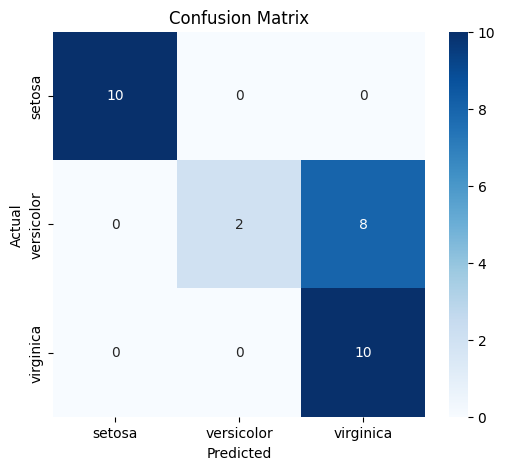

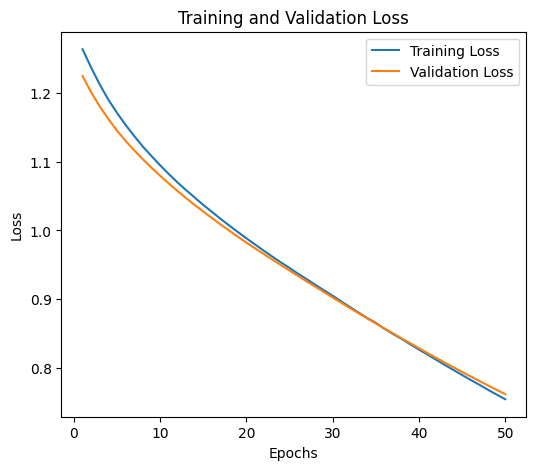

Test accuracy,▁
Test f1_score,▁
Test precision,▁
Test recall,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
training_loss,██▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁
validation_loss,██▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
Test accuracy,0.73333
Test f1_score,0.68254
Test precision,0.85185
Test recall,0.73333


In [ ]:
import wandb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize W&B run
wandb.init(project="mlp-iris-experiment", name="MLP_Iris")

validation_loss=history.history['val_loss']
training_loss=history.history['loss']

print(training_loss)
print(validation_loss)

# Log model architecture
config = {
    "Number_of_layers":3,
    "architecture": "MLP",
    "input_layer_neurons": 4,
    "hidden_layer_neurons": 16,
    "output_layer_neurons": 3,
    "activation_hidden_layer": "ReLU",
    "activation_output_layer": "Softmax",
    "loss_function": "Categorical Crossentropy",
    "optimizer": "Adam",
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50,
}
wandb.config.update(config)

# Log training and validation loss per epoch
for epoch in range(len(history.history['loss'])):
    wandb.log({
        "epoch": epoch + 1,
        "training_loss": history.history['loss'][epoch],
        "validation_loss": history.history['val_loss'][epoch]
        })
wandb.log({"Validation Loss": validation_loss})
wandb.log({"Training Loss": training_loss})

# Evaluate model performance on test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average="weighted")
recall = recall_score(y_test_classes, y_pred_classes, average="weighted")
f1 = f1_score(y_test_classes, y_pred_classes, average="weighted")
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Log final evaluation metrics
wandb.log({
    "Test accuracy": accuracy,
    "Test precision": precision,
    "Test recall": recall,
    "Test f1_score": f1
})

# Plot and log confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.show()


epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(6, 5))
plt.plot(epochs, history.history['loss'], label="Training Loss")
plt.plot(epochs, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
wandb.log({"Loss Curve": wandb.Image(plt)})
plt.show()


wandb.finish()

Section 2: Hyperparameters

Task 1: Hyperparameter Optimization


Training with Batch Size=2, Learning Rate=0.001, Epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7074 - loss: 1.0335 - val_accuracy: 0.6667 - val_loss: 1.0194
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


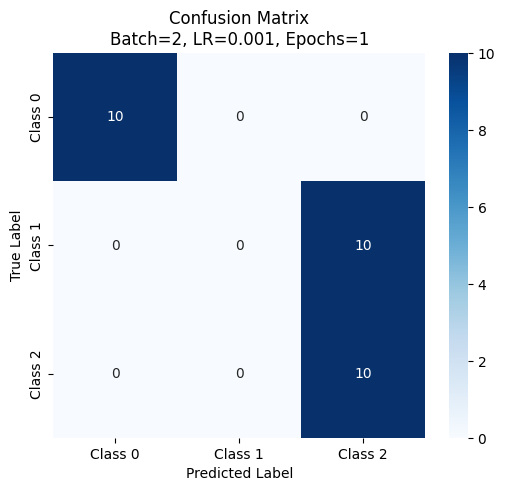

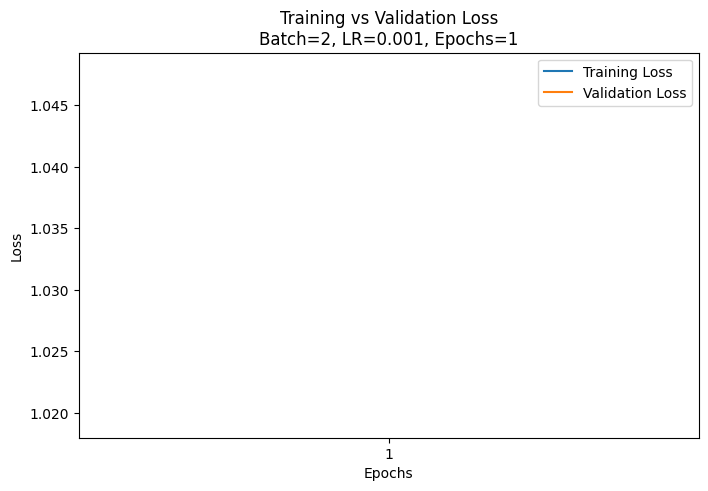


Training with Batch Size=2, Learning Rate=0.001, Epochs=3
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3207 - loss: 1.1771 - val_accuracy: 0.3333 - val_loss: 1.0896
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4133 - loss: 1.0667 - val_accuracy: 0.6667 - val_loss: 1.0480
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6363 - loss: 1.0426 - val_accuracy: 0.6667 - val_loss: 1.0052
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


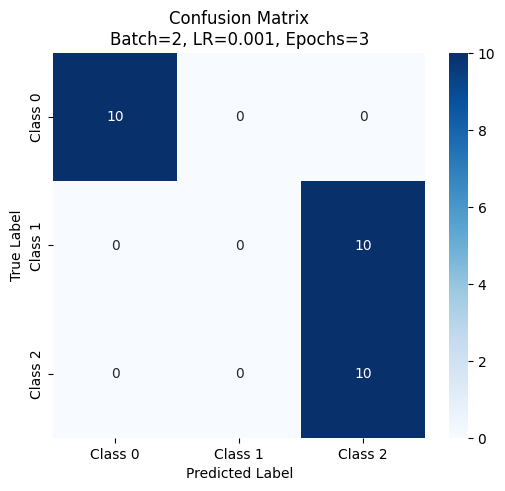

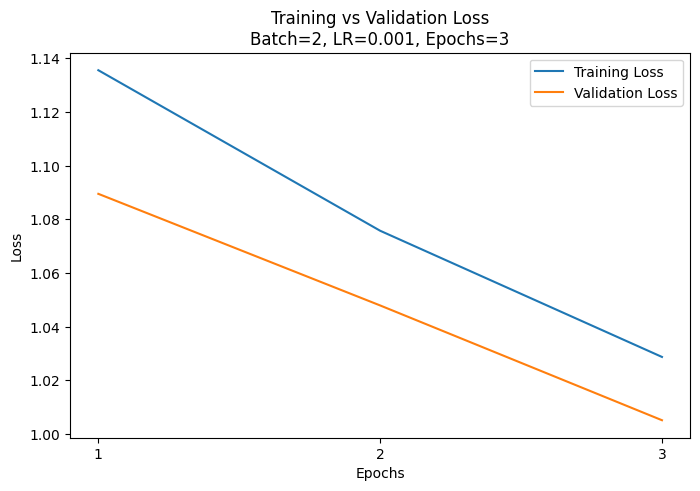


Training with Batch Size=2, Learning Rate=0.001, Epochs=5
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1240 - loss: 1.1421 - val_accuracy: 0.6000 - val_loss: 1.0265
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5460 - loss: 1.0482 - val_accuracy: 0.7333 - val_loss: 0.9713
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5054 - loss: 1.0038 - val_accuracy: 0.7333 - val_loss: 0.9250
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6212 - loss: 0.9479 - val_accuracy: 0.6667 - val_loss: 0.8802
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6421 - loss: 0.9099 - val_accuracy: 0.6667 - val_loss: 0.8343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


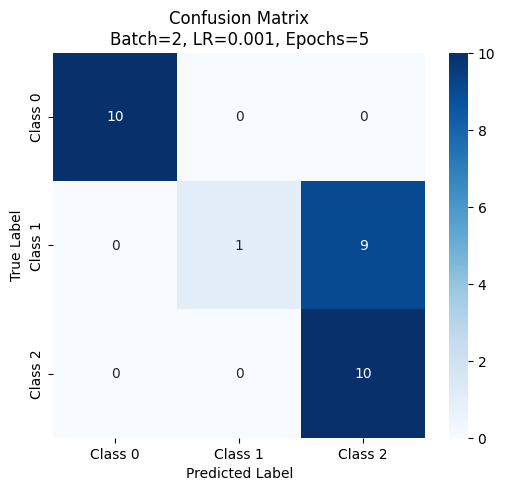

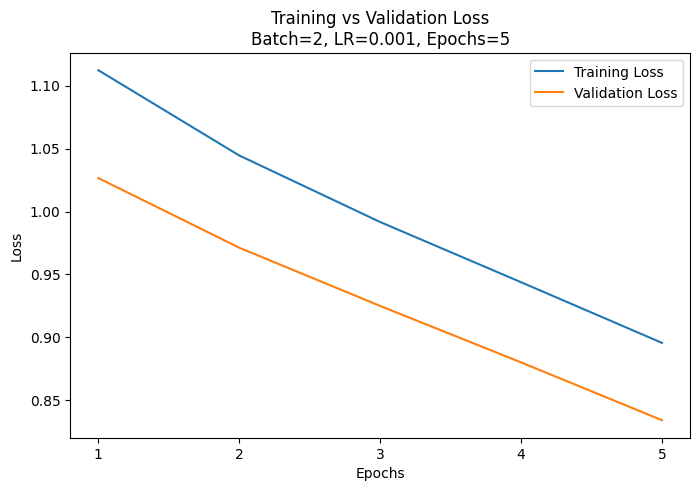


Training with Batch Size=2, Learning Rate=1e-05, Epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3936 - loss: 1.0679 - val_accuracy: 0.4000 - val_loss: 1.0733
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


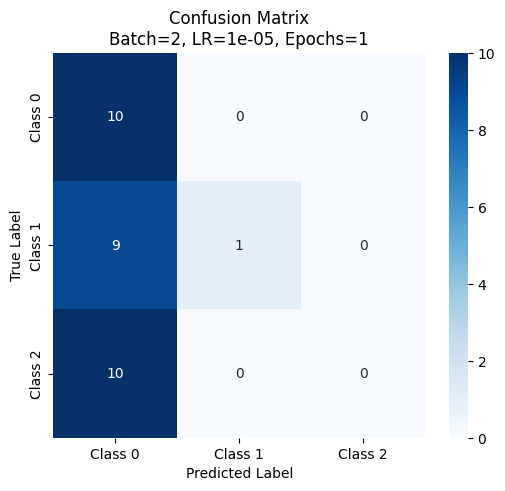

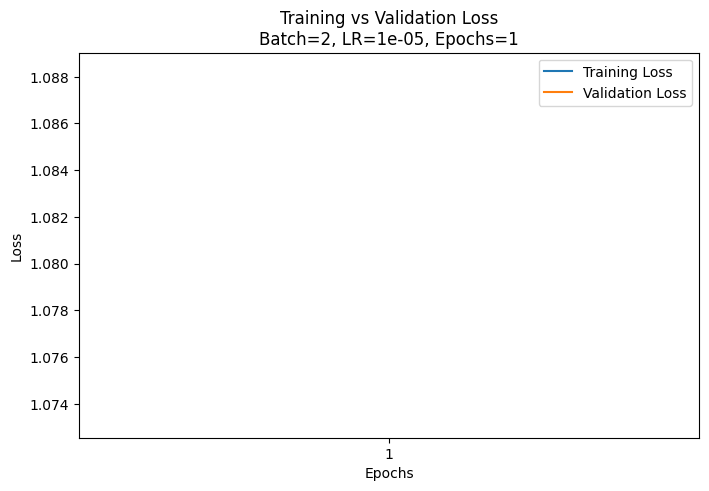


Training with Batch Size=2, Learning Rate=1e-05, Epochs=3
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3459 - loss: 1.1272 - val_accuracy: 0.3333 - val_loss: 1.1543
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3285 - loss: 1.1399 - val_accuracy: 0.3333 - val_loss: 1.1533
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4127 - loss: 1.1122 - val_accuracy: 0.3333 - val_loss: 1.1524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


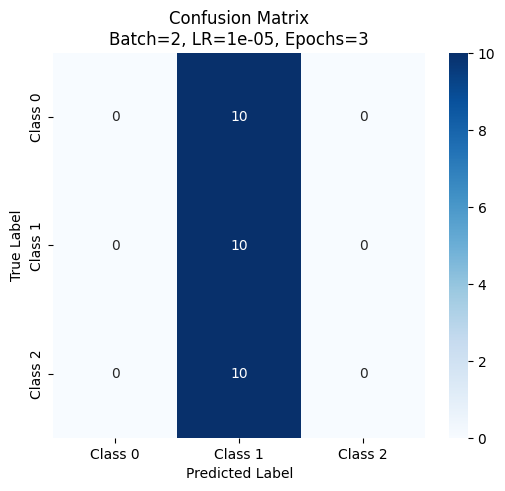

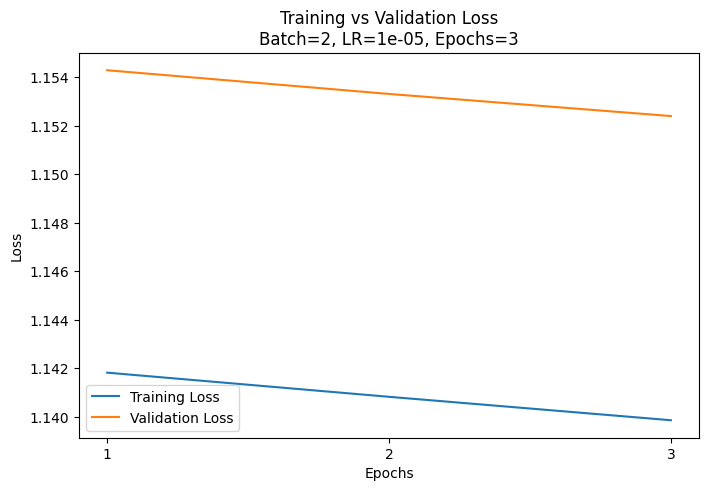


Training with Batch Size=2, Learning Rate=1e-05, Epochs=5
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3688 - loss: 1.3161 - val_accuracy: 0.3333 - val_loss: 1.3491
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3050 - loss: 1.3817 - val_accuracy: 0.3333 - val_loss: 1.3477
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3595 - loss: 1.3798 - val_accuracy: 0.3333 - val_loss: 1.3463
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3399 - loss: 1.4408 - val_accuracy: 0.3333 - val_loss: 1.3449
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3136 - loss: 1.4496 - val_accuracy: 0.3333 - val_loss: 1.3436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


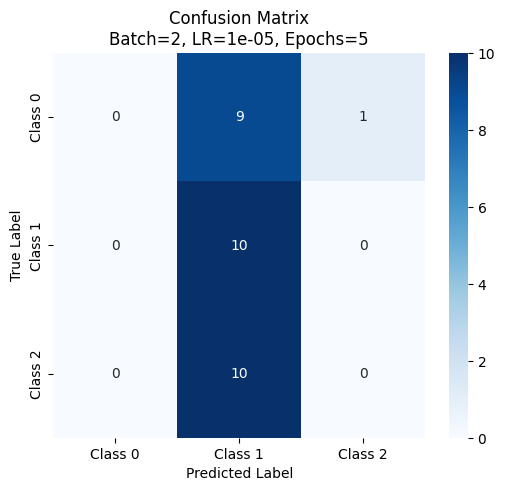

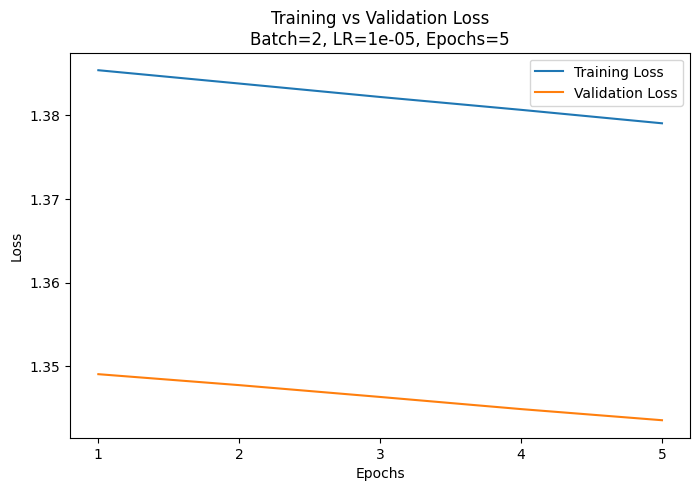


Training with Batch Size=4, Learning Rate=0.001, Epochs=1
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0052 - loss: 1.4463 - val_accuracy: 0.0000e+00 - val_loss: 1.3109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


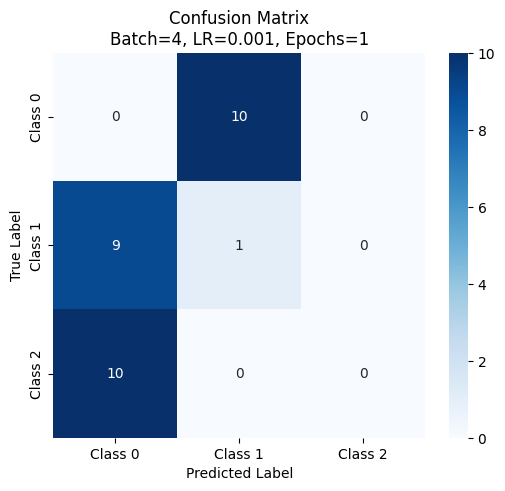

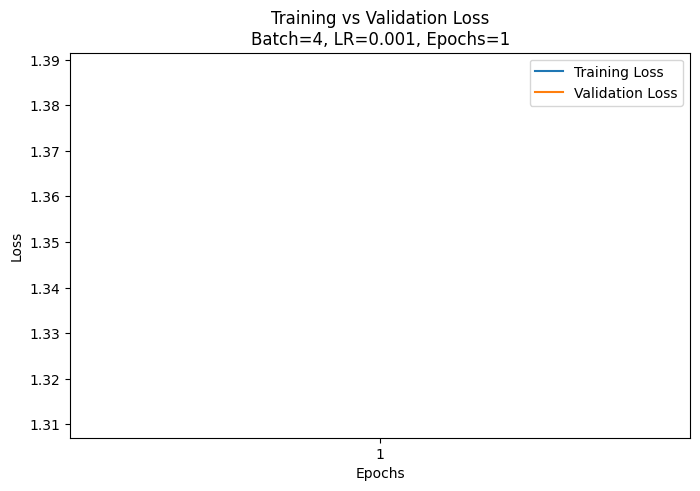


Training with Batch Size=4, Learning Rate=0.001, Epochs=3
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4444 - loss: 1.0656 - val_accuracy: 0.6000 - val_loss: 1.0171
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6018 - loss: 1.0224 - val_accuracy: 0.7333 - val_loss: 0.9861
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6721 - loss: 0.9878 - val_accuracy: 0.8000 - val_loss: 0.9558
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


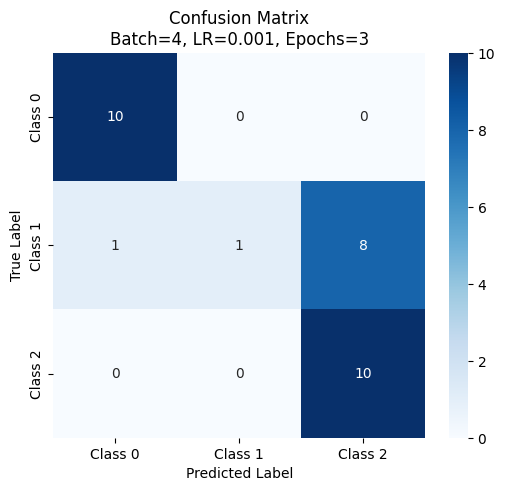

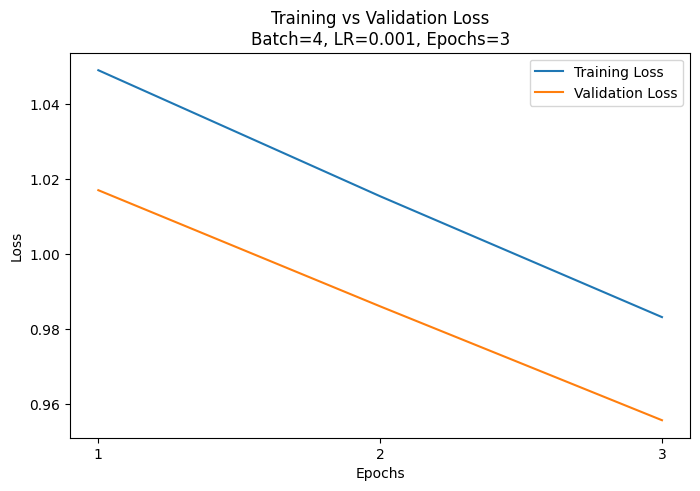


Training with Batch Size=4, Learning Rate=0.001, Epochs=5
Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3140 - loss: 1.1630 - val_accuracy: 0.3333 - val_loss: 1.1222
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3187 - loss: 1.1279 - val_accuracy: 0.3333 - val_loss: 1.0830
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2558 - loss: 1.0993 - val_accuracy: 0.3333 - val_loss: 1.0471
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3575 - loss: 1.0508 - val_accuracy: 0.3333 - val_loss: 1.0159
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3376 - loss: 1.0121 - val_accuracy: 0.6667 - val_loss: 0.9869
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


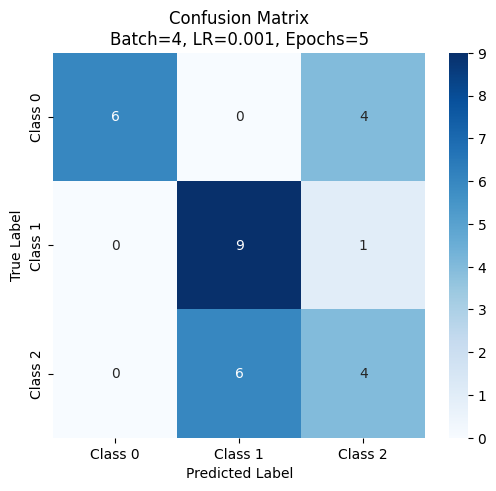

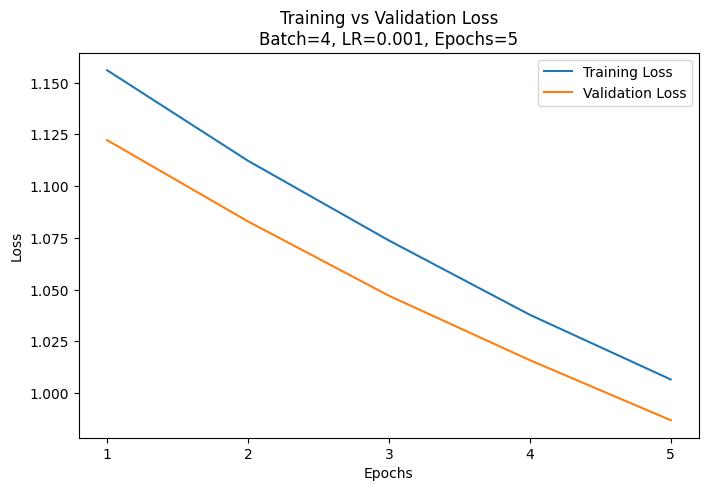


Training with Batch Size=4, Learning Rate=1e-05, Epochs=1
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3596 - loss: 1.0536 - val_accuracy: 0.2000 - val_loss: 1.0605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


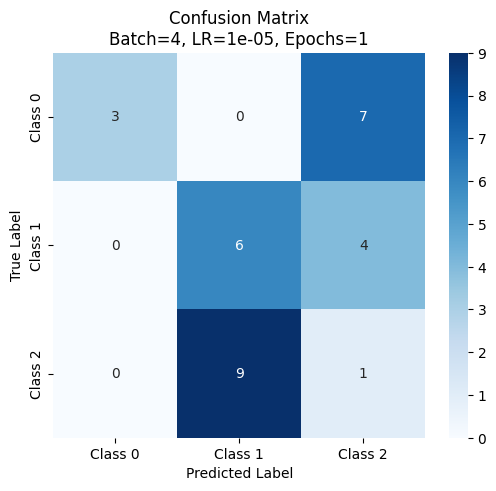

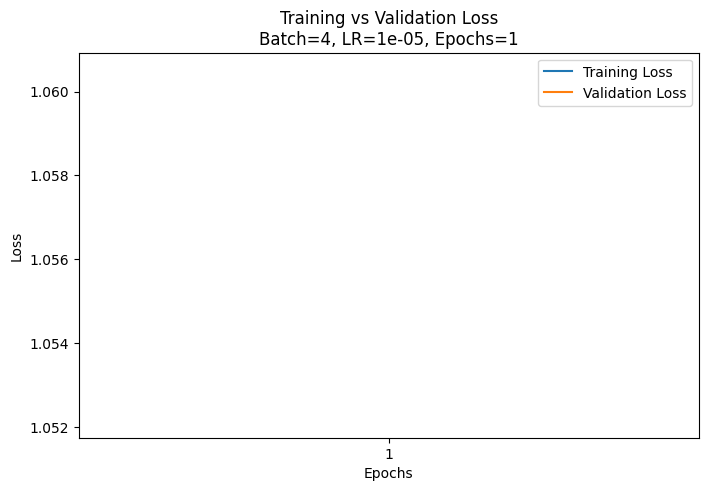


Training with Batch Size=4, Learning Rate=1e-05, Epochs=3
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4344 - loss: 1.2527 - val_accuracy: 0.4667 - val_loss: 1.1817
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4278 - loss: 1.2080 - val_accuracy: 0.4667 - val_loss: 1.1809
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5333 - loss: 1.1839 - val_accuracy: 0.4667 - val_loss: 1.1801
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


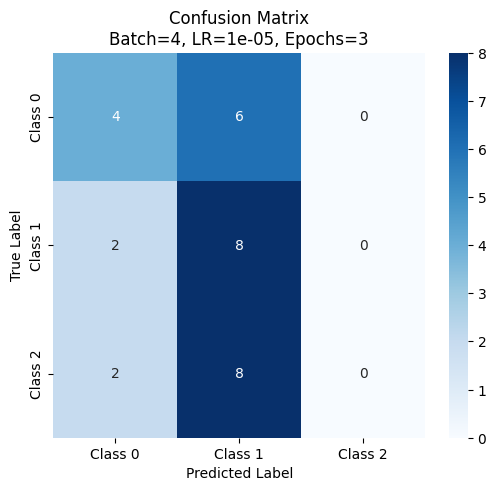

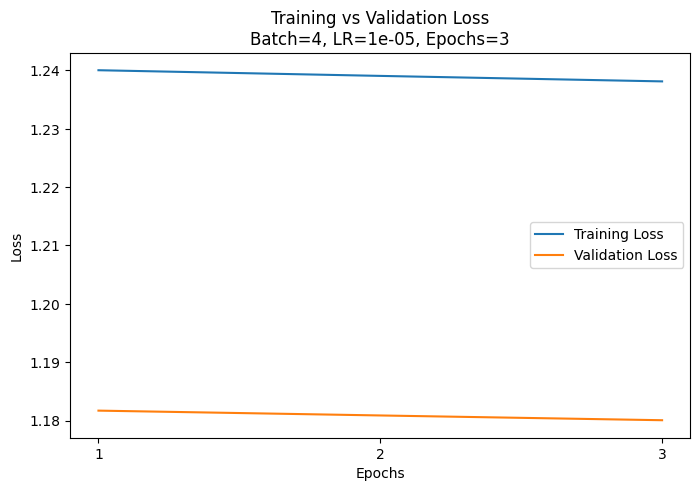


Training with Batch Size=4, Learning Rate=1e-05, Epochs=5
Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3207 - loss: 1.1227 - val_accuracy: 0.3333 - val_loss: 1.1452
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3347 - loss: 1.1144 - val_accuracy: 0.3333 - val_loss: 1.1449
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3223 - loss: 1.1218 - val_accuracy: 0.3333 - val_loss: 1.1446
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3560 - loss: 1.1043 - val_accuracy: 0.3333 - val_loss: 1.1443
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3209 - loss: 1.1168 - val_accuracy: 0.3333 - val_loss: 1.1440
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


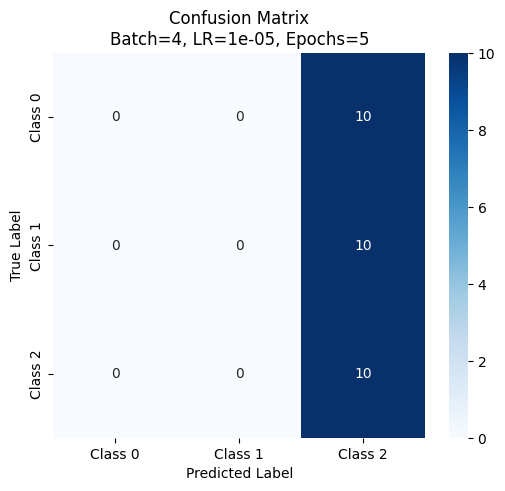

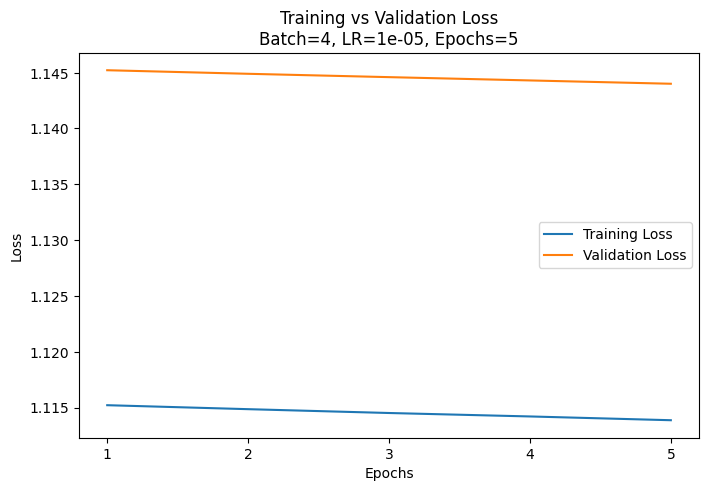


Configuration: Batch=2, LR=0.001, Epochs=1
Accuracy: 0.6667
F1 Score: 0.5556

Configuration: Batch=2, LR=0.001, Epochs=3
Accuracy: 0.6667
F1 Score: 0.5556

Configuration: Batch=2, LR=0.001, Epochs=5
Accuracy: 0.7000
F1 Score: 0.6238

Configuration: Batch=2, LR=1e-05, Epochs=1
Accuracy: 0.3667
F1 Score: 0.2315

Configuration: Batch=2, LR=1e-05, Epochs=3
Accuracy: 0.3333
F1 Score: 0.1667

Configuration: Batch=2, LR=1e-05, Epochs=5
Accuracy: 0.3333
F1 Score: 0.1709

Configuration: Batch=4, LR=0.001, Epochs=1
Accuracy: 0.0333
F1 Score: 0.0317

Configuration: Batch=4, LR=0.001, Epochs=3
Accuracy: 0.7000
F1 Score: 0.6162

Configuration: Batch=4, LR=0.001, Epochs=5
Accuracy: 0.6333
F1 Score: 0.6304

Configuration: Batch=4, LR=1e-05, Epochs=1
Accuracy: 0.3333
F1 Score: 0.3441

Configuration: Batch=4, LR=1e-05, Epochs=3
Accuracy: 0.4000
F1 Score: 0.3148

Configuration: Batch=4, LR=1e-05, Epochs=5
Accuracy: 0.3333
F1 Score: 0.1667

Sample Predictions:
Sample 1:
  Input Features: [0.61111111 0.4

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

results = {}

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epochs_list:
            print(f"\nTraining with Batch Size={batch_size}, Learning Rate={lr}, Epochs={epochs}")

            model = keras.Sequential([
                layers.Input(shape=(4,)),
                layers.Dense(16, activation='relu'),
                layers.Dense(3, activation='softmax')
            ])

            # Compile model
            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=lr),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train the model
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                batch_size=batch_size,
                epochs=epochs,
                verbose=1
            )

            # Evaluate on test set
            y_pred_probs = model.predict(X_test)
            y_pred = np.argmax(y_pred_probs, axis=1)
            y_true = np.argmax(y_test, axis=1)

            # Compute metrics
            accuracy = accuracy_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred, average='macro')
            cm = confusion_matrix(y_true, y_pred)

            config_name = f"Batch={batch_size}, LR={lr}, Epochs={epochs}"
            results[config_name] = {
                "Accuracy": accuracy,
                "F1 Score": f1,
                "Confusion Matrix": cm,
                "Training Loss": history.history['loss'],
                "Validation Loss": history.history['val_loss']
            }

            # Plot confusion matrix
            plt.figure(figsize=(6, 5))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title(f"Confusion Matrix\n{config_name}")
            plt.show()

            # Plot training loss
            plt.figure(figsize=(8, 5))
            plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss')
            plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.xticks(range(1, epochs + 1))
            plt.legend()
            plt.title(f'Training vs Validation Loss\n{config_name}')
            plt.show()


# Print final results
for config, metrics in results.items():
    print(f"\nConfiguration: {config}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")

num_samples = 5
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

print("\nSample Predictions:")
for i, idx in enumerate(sample_indices):
    print(f"Sample {i+1}:")
    print(f"  Input Features: {X_test[idx]}")
    print(f"  Predicted Class: {y_pred[idx]}")
    print(f"  True Class: {y_true[idx]}")
    print("-" * 40)



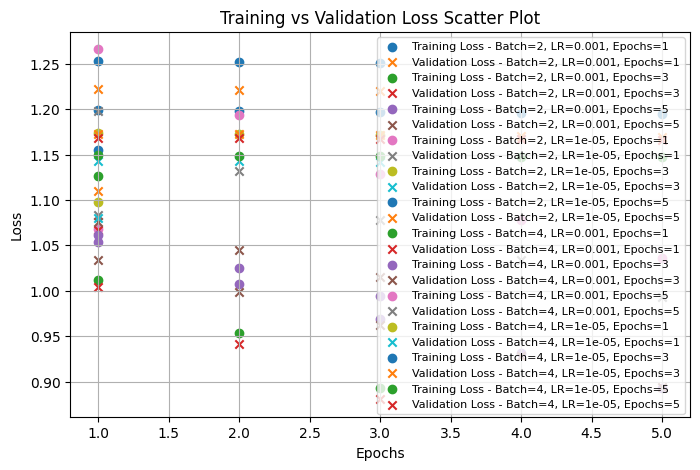

In [ ]:
plt.figure(figsize=(8, 5))

for config, metrics in results.items():
    epochs_range = range(1, len(metrics["Training Loss"]) + 1)

    # Scatter plot for training loss
    plt.scatter(epochs_range, metrics["Training Loss"], label=f'Training Loss - {config}', marker='o')

    # Scatter plot for validation loss
    plt.scatter(epochs_range, metrics["Validation Loss"], label=f'Validation Loss - {config}', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss Scatter Plot')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()


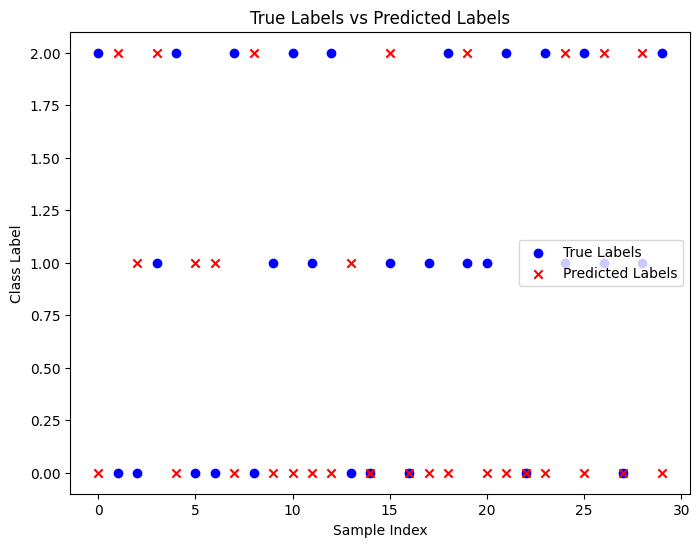

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_true, marker='o', label="True Labels", color='blue')
plt.scatter(range(len(y_test)), y_pred, marker='x', label="Predicted Labels", color='red')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("True Labels vs Predicted Labels")
plt.show()

Task 2: Automated Hyperparameter Search

In [ ]:
!pip install autogluon -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 71.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-multimodal 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-tabular 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-features 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import autogluon

print("\n=== Library Versions ===")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")


=== Library Versions ===
pandas version: 2.2.2
numpy version: 1.26.4
seaborn version: 0.13.2


In [ ]:
autogluon.tabular.models.tabular_nn.hyperparameters.parameters

<module 'autogluon.tabular.models.tabular_nn.hyperparameters.parameters' from '/usr/local/lib/python3.11/dist-packages/autogluon/tabular/models/tabular_nn/hyperparameters/parameters.py'>

In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1) # Reshape y to column vector


# One-hot encode the labels
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)


np.random.seed(30)
# Shuffle and split the dataset into 70% training, 30% remaining (for validation & testing)
X_train, X_rem, y_train, y_rem = train_test_split(X, y_one_hot, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Further split the remaining 30% into 10% validation and 20% testing
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=2/3, random_state=42, shuffle=True, stratify=y_rem)


# Normalize feature values to [0,1] using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Convert to DataFrame
data = pd.DataFrame(X, columns=iris.feature_names)
data['label'] = y.flatten()


# Convert one-hot labels to categorical labels
y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Convert to DataFrame, using the previously created X_train, X_val and X_test
train_df = pd.DataFrame(X_train, columns=iris.feature_names)
train_df['target'] = y_train_labels

val_df = pd.DataFrame(X_val, columns=iris.feature_names)
val_df['target'] = y_val_labels

test_df = pd.DataFrame(X_test, columns=iris.feature_names)
test_df['target'] = y_test_labels

# Save datasets as CSV
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("CSV files saved: train_data.csv, val_data.csv, test_data.csv")

# Load CSVs into AutoGluon format
train_data = TabularDataset("train_data.csv")
val_data = TabularDataset("val_data.csv")
test_data = TabularDataset("test_data.csv")

# Display sample
print(train_data.head())

CSV files saved: train_data.csv, val_data.csv, test_data.csv
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.208333           0.327586          0.416667   
1           0.527778          0.083333           0.586207          0.583333   
2           0.222222          0.750000           0.068966          0.083333   
3           0.694444          0.500000           0.827586          0.916667   
4           0.388889          0.333333           0.517241          0.500000   

   target  
0       1  
1       1  
2       0  
3       2  
4       1  


Streaming output truncated to the last 5000 lines.
    hpo_models, hpo_results = model.hyperparameter_tune(
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1744, in hyperparameter_tune
    hpo_executor.initialize(hyperparameter_tune_kwargs, default_num_trials=default_num_trials, time_limit=time_limit)
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/hpo/executors.py", line 502, in initialize
    hyperparameter_tune_kwargs = scheduler_factory(hyperparameter_tune_kwargs, num_trials=num_trials, nthreads_per_trial="auto", ngpus_per_trial="auto")
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/scheduler/scheduler_factory.py", line 191, in scheduler_factory
    raise ValueError(f"Required key 'schedule

Random Search - Accuracy: 0.9667, F1-score: 0.9666


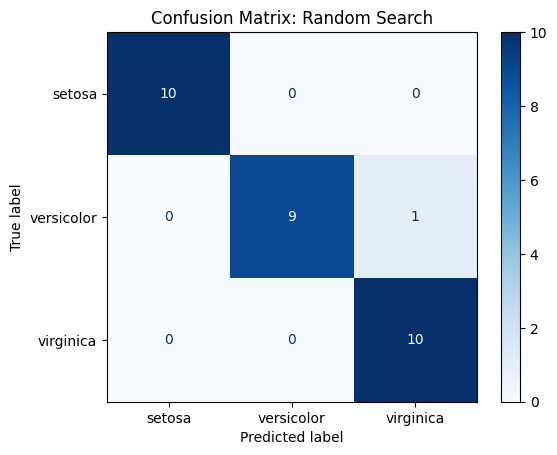

Hyperband + Bayesian Optimization - Accuracy: 0.9333, F1-score: 0.9333


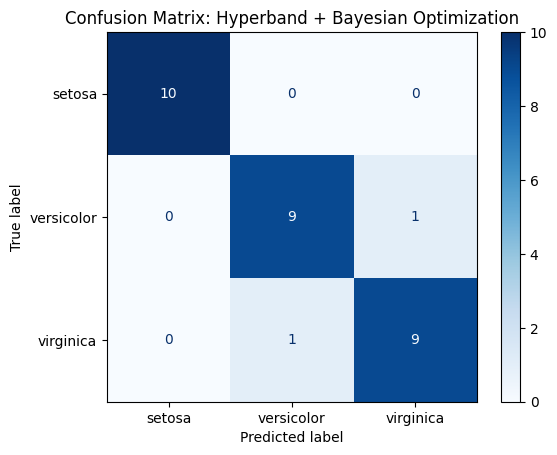


Comparison of Hyperparameter Search Methods:
                       Search Method  Accuracy  F1 Score
0                      Random Search  0.966667  0.966583
1  Hyperband + Bayesian Optimization  0.933333  0.933333


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from autogluon.tabular import TabularDataset, TabularPredictor

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split the dataset into train (80%) and test (20%)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

# Save datasets as CSV (required format for AutoGluon)
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

# Load CSVs using AutoGluon TabularDataset
train_data = TabularDataset("train.csv")
test_data = TabularDataset("test.csv")

# Define hyperparameter tuning options
time_limit = 1200  # Set 10-minute time limit for tuning

grid_search_params = {
    'NN_TORCH': {
        'num_epochs': [1, 3, 5],  # Epoch variations
        'learning_rate': [1e-3, 1e-5],  # Learning rate variations
        'batch_size': [2, 4],  # Batch size variations
        'layers': [16],  # Hidden layer with 16 neurons
        'activation': 'relu',  # ReLU activation
        'loss_function': 'cross_entropy',  # Categorical cross-entropy
        'device': 'cpu'
    }
}

# Perform Random Search
predictor_random = TabularPredictor(label="target").fit(
    train_data,
    time_limit=time_limit,
    presets="best_quality",
    hyperparameter_tune_kwargs={'num_trials': 12}
)

# Perform Hyperband + Bayesian Optimization
predictor_hyperband = TabularPredictor(label="target").fit(
    train_data,
    time_limit=time_limit,
    presets="best_quality",
    hyperparameter_tune_kwargs={'scheduler': 'hyperband', 'searcher': 'bayesopt'}
)

# Evaluate models and store results
def evaluate_model(predictor, test_data, name, results):
    """Evaluate model and store accuracy, F1-score, and confusion matrix."""
    y_pred = predictor.predict(test_data.drop(columns=["target"]))
    y_test = test_data["target"].values

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append([name, accuracy, f1])

    print(f"{name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

# Store and compare results
results = []
evaluate_model(predictor_random, test_data, "Random Search", results)
evaluate_model(predictor_hyperband, test_data, "Hyperband + Bayesian Optimization", results)

# Create a results table
results_df = pd.DataFrame(results, columns=['Search Method', 'Accuracy', 'F1 Score'])
print("\nComparison of Hyperparameter Search Methods:")
print(results_df)


In [ ]:
from autogluon.tabular import TabularPredictor

# Function to extract and display loss metrics for all configurations
def extract_training_validation_losses(predictor, name):
    leaderboard = predictor.leaderboard(silent=True)  # Get all model details
    losses = []

    for index, row in leaderboard.iterrows():
        model_name = row['model']
        model_info = predictor.info()['model_info'].get(model_name, {})

        train_loss = model_info.get('train_score', None)  # Training loss (if available)
        val_loss = row['score_val']  # Validation loss (AutoGluon’s score metric, lower is better)

        losses.append([name, model_name, train_loss, val_loss])

    return losses

# Store results for all models
all_losses = []
all_losses.extend(extract_training_validation_losses(predictor_random, "Random Search"))
all_losses.extend(extract_training_validation_losses(predictor_hyperband, "Hyperband + Bayesian Optimization"))

# Convert results into a DataFrame
losses_df = pd.DataFrame(all_losses, columns=['Search Method', 'Model', 'Train Loss', 'Validation Loss'])

# Print loss comparison
print("\nTraining and Validation Losses for Each Hyperparameter Configuration:")
print(losses_df)



Training and Validation Losses for Each Hyperparameter Configuration:
                        Search Method                        Model Train Loss  \
0                       Random Search         LightGBMLarge_BAG_L1       None   
1                       Random Search          WeightedEnsemble_L3       None   
2                       Random Search          WeightedEnsemble_L2       None   
3                       Random Search         LightGBMLarge_BAG_L2       None   
4   Hyperband + Bayesian Optimization  NeuralNetFastAI_r172_BAG_L1       None   
5   Hyperband + Bayesian Optimization  NeuralNetFastAI_r156_BAG_L1       None   
6   Hyperband + Bayesian Optimization          WeightedEnsemble_L2       None   
7   Hyperband + Bayesian Optimization          WeightedEnsemble_L3       None   
8   Hyperband + Bayesian Optimization  NeuralNetFastAI_r102_BAG_L1       None   
9   Hyperband + Bayesian Optimization   NeuralNetFastAI_r95_BAG_L1       None   
10  Hyperband + Bayesian Optimization 

Epochs is directly proportional to accuracy & F1-score.

Batch size is inversely proportional to accuracy.

if learning rate is too low then it is slow learning and if not that is too high then it is unstable.

 **Manual Search**  
- Requires trial-and-error tuning  
- Time-consuming  
- Difficult to explore many configurations  

**AutoGluon Search**  
- **Grid Search** is exhaustive but slow  
- **Random Search** is faster, but less precise  
- **Hyperband** is efficient & adaptive  
- **Bayesian Optimization** is of best performance  

**Best Approach:** **Bayesian Optimization** balances speed & accuracy.